# 1141_社會資料分析 作業二
學生：劉晏成

## 題目
以「2018台北大學社會系三鶯調查」（brilliant_working.sav）檔案回答下列問題：
1. 計算環境行為（c1）總分的集中量數（平均數、中位數、眾數）和變異量數（全距、四分位差、標準差）
2. 分別計算個人收入（b1）的百分等級和Z分數，並比較原始分數、百分等級、Z分數三者的偏態

In [1]:
from load import load_sav

df = load_sav("../data/brilliant_working.sav")

In [2]:
variable_value_labels = df.attrs['variable_value_labels']
column_names = df.attrs['column_names']
column_names_to_labels = df.attrs['column_names_to_labels']

## Q1: 計算環境行為（c1）總分的集中量數（平均數、中位數、眾數）和變異量數（全距、四分位差、標準差）

In [3]:
df_1 = df[['c1a', 'c1b', 'c1c', 'c1d', 'c1e', 'c1f', 'c1g']].copy()

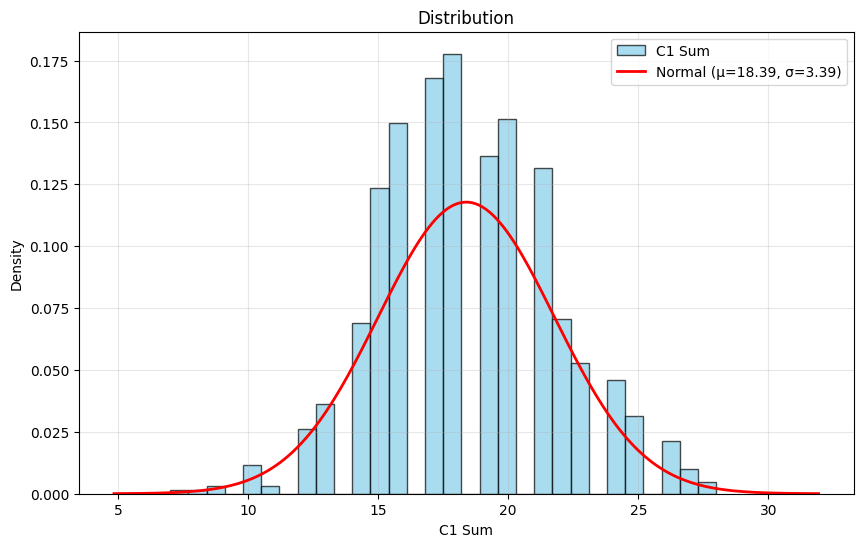

In [4]:
df_1.loc[:, 'c1_sum'] = df_1[['c1a', 'c1b', 'c1c', 'c1d', 'c1e', 'c1f', 'c1g']].sum(axis=1)

from plot.distribution import distribution_plot
distribution_plot(df_1.loc[:, 'c1_sum'], xlabel = 'C1 Sum')

In [5]:
df_1_describe = df_1['c1_sum'].describe()
mean = df_1_describe['mean']
std = df_1_describe['std']
median = df_1_describe['50%']
_min = df_1_describe['min']
_max = df_1_describe['max']
q1 = df_1_describe['25%']
q3 = df_1_describe['75%']
mode = df_1.loc[:, 'c1_sum'].mode()[0]

### Answers

In [6]:
import pandas as pd

answer = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Range', 'Q1', 'Q3', 'Standard Deviation'],
    'Value': [mean, median, mode, _max - _min, q1, q3, std]
})

answer.style.hide(axis='index')

Statistic,Value
Mean,18.387097
Median,18.000000
Mode,18.000000
Range,21.000000
Q1,16.000000
Q3,21.000000
Standard Deviation,3.388347


## Q2: 分別計算個人收入（b1）的百分等級和Z分數，並比較原始分數、百分等級、Z分數三者的偏態

In [7]:
df_2 = df[['b1']].copy().rename(columns = { 'b1': 'income' })

### Filter out '拒答'(997.0), '漏答'(998.0), '不適用'(999.0), and nullish rows from dataset

In [8]:
df_2_clean = df_2[
    (df_2['income'].notna()) & 
    (~df_2['income'].isin([997.0, 998.0, 999.0]))
]
df_2_clean.value_counts().sort_index()

income
0.0       139
1.0        29
2.0        68
3.0       137
4.0       201
5.0        96
6.0        74
7.0        25
8.0        27
9.0         8
10.0       19
11.0       12
12.0        1
13.0        4
15.0       24
Name: count, dtype: int64

### Answers

#### 1. 分別計算個人收入（b1）的百分等級和Z分數

In [9]:
from statistic.distribution import get_distribution_summary

df_2_distribution_summary = get_distribution_summary(df_2_clean['income'])
df_2_distribution_summary['value'] = df_2_distribution_summary['value'].map(lambda x: int(x)) 
df_2_distribution_summary.style.hide(axis='index')

value,percentile,z-score,counts
0,8.101852,-1.280352,139
1,17.824074,-0.965457,29
2,23.437500,-0.650563,68
3,35.300926,-0.335669,137
4,54.861111,-0.020774,201
5,72.048611,0.294120,96
6,81.886574,0.609015,74
7,87.615741,0.923909,25
8,90.625000,1.238803,27
9,92.650463,1.553698,8


#### 2. 比較原始分數、百分等級、Z分數三者的偏態

**Calculate z-score and percentile for each data point**

In [10]:
z_score_dict = dict(zip(df_2_distribution_summary['value'], df_2_distribution_summary['z-score']))
percentile_dict = dict(zip(df_2_distribution_summary['value'], df_2_distribution_summary['percentile']))


df_2_clean.loc[:, ['z_score']] = df_2_clean['income'].map(lambda x: z_score_dict[x])
df_2_clean.loc[:, ['percentile']] = df_2_clean['income'].map(lambda x: percentile_dict[x])
df_2_clean

,income,z_score,percentile
0,3.0,-0.335669,35.300926
1,4.0,-0.020774,54.861111
2,3.0,-0.335669,35.300926
3,4.0,-0.020774,54.861111
4,1.0,-0.965457,17.824074
...,...,...,...
863,0.0,-1.280352,8.101852
864,0.0,-1.280352,8.101852
865,0.0,-1.280352,8.101852
866,4.0,-0.020774,54.861111


**Plot distribution histograms for income value, percentile, and z-score**

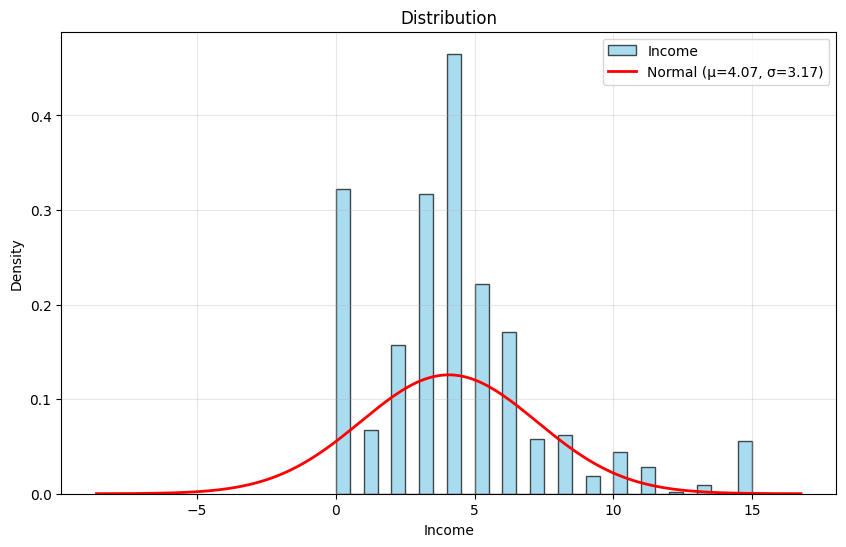

In [11]:
from plot.distribution import distribution_plot

distribution_plot(df_2_clean['income'], xlabel = 'Income')

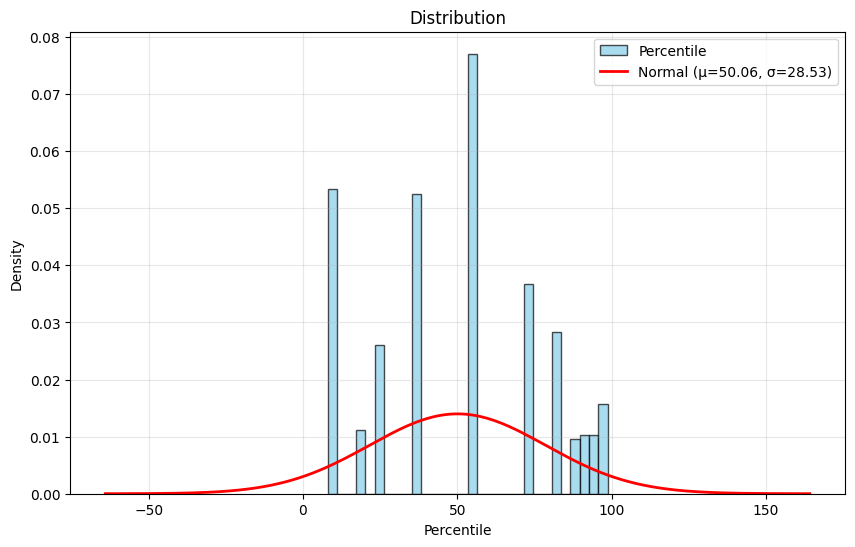

In [12]:
distribution_plot(df_2_clean['percentile'], xlabel = 'Percentile')

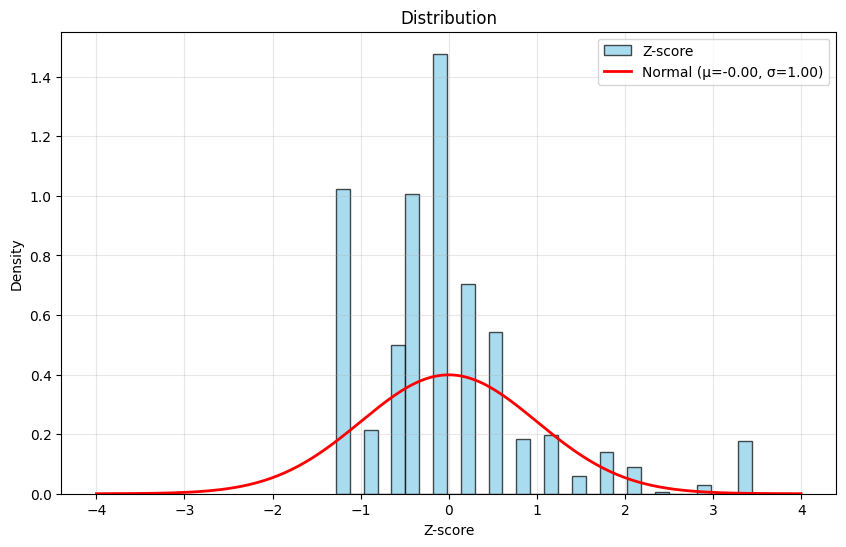

In [13]:
distribution_plot(df_2_clean['z_score'], xlabel = 'Z-score')

**Calculate the skewness of income, percentile, and z-score**

In [14]:
skew_income = df_2_clean['income'].skew()
skew_percentile = df_2_clean['percentile'].skew()
skew_z_score = df_2_clean['z_score'].skew()


In [17]:
answer = pd.DataFrame({
    'Values': [skew_income, skew_percentile, skew_z_score]
}, index=['Raw Skewness', 'Percentile Skewness', 'Z-score Skewness'])
answer

,Values
Raw Skewness,1.291051
Percentile Skewness,0.014375
Z-score Skewness,1.291051


**Conclusion**: As a result, we can see that the skewness of the z-score is identical to the raw value, while the skewness of the percentile is less than the raw one.